In [2]:
import numpy as np
import matplotlib.image as img
from PIL import Image
import numpy.fft as fft
import scipy.stats as stats
import matplotlib.pyplot as plt


<img src= 'practica_4.jpg' width="600px">

In [99]:
# 1) Power spectra, 5 random realizations 
# Create a 1D real space array in order to define your real space framework : between 0 and 10 with 10000
#values
n = 10000
rs_array = np.linspace(0,10,n)
d = 1/(rs_array.shape[-1]-rs_array[0])

# Calculate the corresponding frequencies
#sampling_rate = 1 / (rs_array[1] - rs_array[0]) 
k = np.fft.fftfreq(rs_array.shape[0],d)

for i in range(10):
    print(f"Frequency: {k[i]:.2f} Hz, Binning Information: {1/k[i]:.2f} units")





Frequency: 0.00 Hz, Binning Information: inf units
Frequency: 1.00 Hz, Binning Information: 1.00 units
Frequency: 2.00 Hz, Binning Information: 0.50 units
Frequency: 3.00 Hz, Binning Information: 0.33 units
Frequency: 4.00 Hz, Binning Information: 0.25 units
Frequency: 5.00 Hz, Binning Information: 0.20 units
Frequency: 6.00 Hz, Binning Information: 0.17 units
Frequency: 7.00 Hz, Binning Information: 0.14 units
Frequency: 8.00 Hz, Binning Information: 0.12 units
Frequency: 9.00 Hz, Binning Information: 0.11 units


/tmp/ipykernel_6159/1284720319.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"Frequency: {k[i]:.2f} Hz, Binning Information: {1/k[i]:.2f} units")


Text(0, 0.5, 'P(k)')

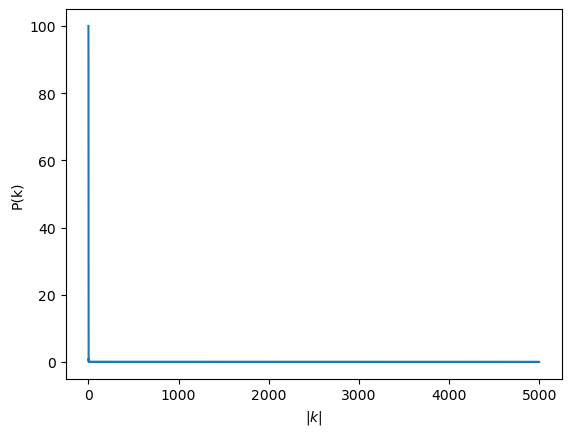

In [105]:
k_norm = np.sqrt(k**2)

e = 0.1

def P_k(k_x, epsilon):
    return (np.sqrt(k_x**2) + epsilon)**(-2)


power_spectrum = P_k(k,e)

plt.plot(k_norm,power_spectrum)
plt.xlabel('$|k|$')
plt.ylabel('P(k)')

In [208]:
# we define the array for alpha and the phase in the following way:
alpha_1 = np.random.normal(0, np.sqrt(P_k(k, e)), n)
alpha_2 = np.random.normal(0, np.sqrt(P_k(k, e)), n)
alpha_3 = np.random.normal(0, np.sqrt(P_k(k, e)), n)
alpha_4 = np.random.normal(0, np.sqrt(P_k(k, e)), n)
alpha_5 = np.random.normal(0, np.sqrt(P_k(k, e)), n)

phi_1 = np.random.uniform(0, 2 * np.pi, n)
phi_2 = np.random.uniform(0, 2 * np.pi, n)
phi_3 = np.random.uniform(0, 2 * np.pi, n)
phi_4 = np.random.uniform(0, 2 * np.pi, n)
phi_5 = np.random.uniform(0, 2 * np.pi, n)

# now, using the simmetry and antisymetry conditions for alpha and phi 
for i in range(1000):
    alpha_1[-i] = alpha_1[i]
    alpha_2[-i] = alpha_2[i]
    alpha_3[-i] = alpha_3[i]
    alpha_4[-i] = alpha_4[i]
    alpha_5[-i] = alpha_5[i]

    phi_1[-i] = -phi_1[i]
    phi_2[-i] = -phi_2[i]
    phi_3[-i] = -phi_3[i]
    phi_4[-i] = -phi_4[i]
    phi_5[-i] = -phi_5[i]

# Compute ð
ð_1 = alpha_1 * np.exp(1j * phi_1)
ð_2 = alpha_2 * np.exp(1j * phi_2)
ð_3 = alpha_3 * np.exp(1j * phi_3)
ð_4 = alpha_4 * np.exp(1j * phi_4)
ð_5 = alpha_5 * np.exp(1j * phi_5)

for i in range(n): 
    ð_1[-i] = np.conj(ð_1[i])  
    ð_2[-i] = np.conj(ð_2[i]) 
    ð_3[-i] = np.conj(ð_3[i]) 
    ð_4[-i] = np.conj(ð_4[i])
    ð_5[-i] = np.conj(ð_5[i]) 

In [209]:

plot1 = fft.ifftn(fft.ifftshift(ð_1))
plot2 = fft.ifftn(fft.ifftshift(ð_2))
plot3 = fft.ifftn(fft.ifftshift(ð_3))
plot4 = fft.ifftn(fft.ifftshift(ð_4))
plot5 = fft.ifftn(fft.ifftshift(ð_5))

    

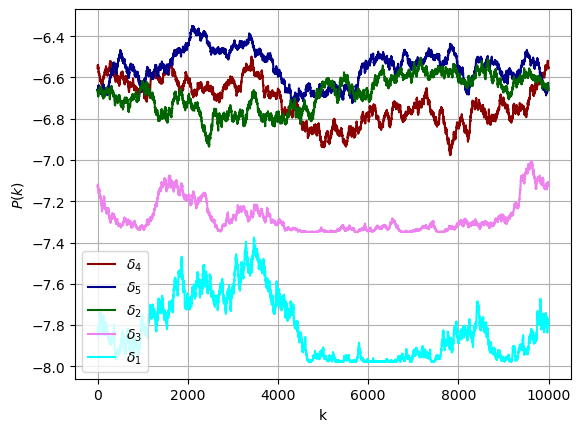

In [210]:

plt.plot(np.log(abs(plot4)),color='darkred',linestyle='-',label='$\delta_4$')
plt.plot(np.log(abs(plot5)),color='darkblue',linestyle='-',label='$\delta_5$')
plt.plot(np.log(abs(plot2)),color='darkgreen',linestyle='-',label='$\delta_2$')
plt.plot(np.log(abs(plot3)),color='violet',linestyle='-',label='$\delta_3$')
plt.plot(np.log(abs(plot1)),color='cyan',linestyle='-',label='$\delta_1$')
plt.xlabel('k')
plt.ylabel('$P(k)$')
plt.legend()
plt.grid()